In [1]:
import math_models_population as population
import math_models_util as util

%matplotlib inline

In [2]:
# Carrying Capacity Dimensions

# Space
spaceTechFactor = util.PiecewiseFtn([50, 100], [0.0, 0.10, 0.20])
spaceEnvFactor = util.PiecewiseFtn([10, 25, 40], [0.0, -0.15, -0.30, -0.35])
space = population.Dimension('space', [spaceTechFactor, spaceEnvFactor])

# Water
waterTechFactor = util.PiecewiseFtn([25, 50], [0.0, 0.10, 0.20])
waterEnvFactor = util.PiecewiseFtn([10, 20, 30], [-0.05, -0.10, -0.20, -0.25])
water = population.Dimension('water', [waterTechFactor, waterEnvFactor])

# Food
foodTechFactor = util.PiecewiseFtn([70, 100], [0.0, 0.05, 0.10])
foodEnvFactor = util.PiecewiseFtn([20, 30, 40], [0.0, -0.05, -0.10, -0.15])
food = population.Dimension('food', [foodTechFactor, foodEnvFactor])

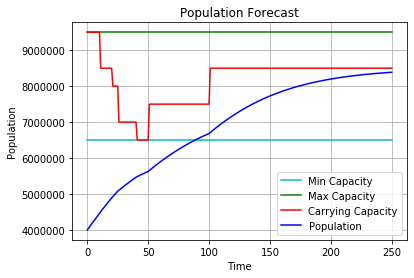

In [3]:
# Logistic Population Model

carryingCapacity = population.CarryingCapacity(10000000, [space, water, food])

logisticModel = population.LogisticModel(0.02, 4000000, carryingCapacity)

t, p = population.solve(logisticModel, maxTime=250)
population.plot(logisticModel, t, p)